In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import nibabel as nib
import bct
from os import makedirs
from matplotlib.colors import LinearSegmentedColormap
from os.path import join, exists
from nilearn.plotting import plot_glass_brain, plot_roi, find_parcellation_cut_coords
#import bct
import datetime
from nilearn.mass_univariate import permuted_ols
from scipy.stats import pearsonr, spearmanr
sns.set_context('poster', font_scale=0.85)
import matplotlib.pyplot as plt

In [91]:
def avg_corrmat(subjects, task, condition, session, atlas):
    post_retr_conn = pd.DataFrame(columns=np.arange(0,268**2))

    for subject in subjects:
        try:
            corrmat = np.genfromtxt(join(sink_dir, '{0}-session-{1}_{2}-{3}_{4}-corrmat.csv'.format(subject,
                                                                                                    session, 
                                                                                                    task,
                                                                                                    condition, 
                                                                                                    atlas)),
                                    delimiter=' ')
            post_retr_conn.at[subject] = np.ravel(corrmat, order='F')
        except Exception as e:
            print(subject, e)
    avg_corrmat = post_retr_conn.mean().values.reshape((268,268), order='F')
    avg_corrmat_df = pd.DataFrame(avg_corrmat, index=np.arange(1,269), columns=np.arange(1,269))
    return avg_corrmat_df

In [2]:
def jili_sidak_mc(data, alpha):
    import math
    import numpy as np

    mc_corrmat = data.corr()
    mc_corrmat.fillna(0, inplace=True)
    eigvals, eigvecs = np.linalg.eig(mc_corrmat)

    M_eff = 0
    for eigval in eigvals:
        if abs(eigval) >= 0:
            if abs(eigval) >= 1:
                M_eff += 1
            else:
                M_eff += abs(eigval) - math.floor(abs(eigval))
        else:
            M_eff += 0
    print('Number of effective comparisons: {0}'.format(M_eff))

    #and now applying M_eff to the Sidak procedure
    sidak_p = 1 - (1 - alpha)**(1/M_eff)
    if sidak_p < 0.00001:
        print('Critical value of {:.3f}'.format(alpha),'becomes {:2e} after corrections'.format(sidak_p))
    else:
        print('Critical value of {:.3f}'.format(alpha),'becomes {:.6f} after corrections'.format(sidak_p))
    return sidak_p, M_eff

In [3]:
subjects = ['101', '102', '103', '104', '106', '107', '108', '110', '212', '213',
            '214', '215', '216', '217', '218', '219', '320', '321', '322', '323',
            '324', '325', '327', '328', '329', '330', '331', '332', '333', '334',
            '335', '336', '337', '338', '339', '340', '341', '342', '343', '344',
            '345', '346', '347', '348', '349', '350', '451', '452', '453', '455',
            '456', '457', '458', '459', '460', '462', '463', '464', '465', '467',
            '468', '469', '470', '502', '503', '571', '572', '573', '574', '575',
            '577', '578', '579', '580', '581', '582', '584', '585', '586', '587',
            '588', '589', '590', '591', '592', '593', '594', '595', '596', '597',
            '598', '604', '605', '606', '607', '608', '609', '610', '611', '612',
            '613', '614', '615', '616', '617', '618', '619', '620', '621', '622',
            '623', '624', '625', '626', '627', '628', '629', '630', '631', '633',
            '634']
#subjects = ['101', '102']

sink_dir = '/Users/katherine/Dropbox/Projects/physics-retrieval/data/output'
data_dir = '/Users/katherine/Dropbox/Projects/physics-retrieval/data'
roi_dir = '/Users/katherine/Dropbox/Data/templates/shen2015/'
fig_dir = '/Users/katherine/Dropbox/Projects/physics-retrieval/figures/'

shen = '/Users/katherine/Dropbox/Projects/physics-retrieval/shen2015_2mm_268_parcellation.nii.gz'
craddock = '/home/kbott006/physics-retrieval/craddock2012_tcorr05_2level_270_2mm.nii.gz'
masks = ['shen2015', 'craddock2012']

tasks = {'reas': [{'conditions': ['Reasoning', 'Baseline']},
                  {'runs': [0,1]}],
         'retr': [{'conditions': ['Physics', 'General']},
                  {'runs': [0,1]}], 
         'fci': [{'conditions': ['Physics', 'NonPhysics']},
                  {'runs': [0,1,2]}]}

sessions = [0,1]
sesh = ['pre', 'post']
conds = ['high-level', 'lower-level']

In [93]:
#null distribtuions for standardization
pre_retr_phys_avg = avg_corrmat(subjects, 'retr', 'Physics', 0, 'shen2015')


213 /Users/katherine/Dropbox/Projects/physics-retrieval/data/output/213-session-0_retr-Physics_shen2015-corrmat.csv not found.
322 /Users/katherine/Dropbox/Projects/physics-retrieval/data/output/322-session-0_retr-Physics_shen2015-corrmat.csv not found.
329 /Users/katherine/Dropbox/Projects/physics-retrieval/data/output/329-session-0_retr-Physics_shen2015-corrmat.csv not found.
332 /Users/katherine/Dropbox/Projects/physics-retrieval/data/output/332-session-0_retr-Physics_shen2015-corrmat.csv not found.
452 /Users/katherine/Dropbox/Projects/physics-retrieval/data/output/452-session-0_retr-Physics_shen2015-corrmat.csv not found.
456 /Users/katherine/Dropbox/Projects/physics-retrieval/data/output/456-session-0_retr-Physics_shen2015-corrmat.csv not found.
457 /Users/katherine/Dropbox/Projects/physics-retrieval/data/output/457-session-0_retr-Physics_shen2015-corrmat.csv not found.
575 /Users/katherine/Dropbox/Projects/physics-retrieval/data/output/575-session-0_retr-Physics_shen2015-corrmat

NameError: name 'bct' is not defined

In [96]:
bct.null_model_und_sign(pre_retr_phys_avg.values)

BCTParamError: Input must be undirected

In [101]:
np.allclose(pre_retr_phys_avg,  pre_retr_phys_avg.T)

True

In [89]:
avg_corrmat = post_retr_conn.mean().values.reshape((268,268), order='F')
avg_corrmat_df = pd.DataFrame(avg_corrmat, index=np.arange(1,269), columns=np.arange(1,269))

In [90]:
avg_corrmat_df

,1,2,3,4,5,6,7,8,9,10,...,259,260,261,262,263,264,265,266,267,268
1,1.000000,0.410428,0.435370,0.476117,0.435234,0.461970,0.443374,0.334268,0.357220,0.386052,...,0.311753,0.219321,0.232365,0.267614,0.295216,0.230734,0.194710,0.122518,0.195470,0.171234
2,0.410428,1.000000,0.428995,0.459546,0.406084,0.309939,0.293627,0.244415,0.256883,0.256737,...,0.392076,0.184354,0.191691,0.260855,0.275073,0.207338,0.147668,0.150981,0.196061,0.197339
3,0.435370,0.428995,1.000000,0.488264,0.422617,0.290222,0.222052,0.191026,0.188602,0.266872,...,0.251211,0.108339,0.103465,0.161178,0.170405,0.141642,0.063746,0.058041,0.089208,0.084927
4,0.476117,0.459546,0.488264,1.000000,0.320810,0.248362,0.267764,0.256093,0.257272,0.213935,...,0.267366,0.144405,0.159856,0.187115,0.193474,0.153156,0.102360,0.079900,0.119464,0.115489
5,0.435234,0.406084,0.422617,0.320810,1.000000,0.551060,0.394595,0.356116,0.423067,0.558057,...,0.314939,0.115070,0.163522,0.215583,0.177577,0.215263,0.113053,0.097043,0.170169,0.225884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,0.230734,0.207338,0.141642,0.153156,0.215263,0.239173,0.238870,0.207188,0.247252,0.185565,...,0.289886,0.481592,0.223834,0.373767,0.480932,1.000000,0.219030,0.136965,0.192956,0.152011
265,0.194710,0.147668,0.063746,0.102360,0.113053,0.146665,0.153439,0.138883,0.193472,0.139397,...,0.353976,0.207073,0.308111,0.443984,0.378934,0.219030,1.000000,0.193800,0.335693,0.177844
266,0.122518,0.150981,0.058041,0.079900,0.097043,0.138239,0.125368,0.100114,0.116407,0.069963,...,0.221546,0.135014,0.155712,0.180010,0.189853,0.136965,0.193800,1.000000,0.318845,0.268759
267,0.195470,0.196061,0.089208,0.119464,0.170169,0.205399,0.201762,0.192087,0.214366,0.182974,...,0.298745,0.184069,0.272598,0.318653,0.278800,0.192956,0.335693,0.318845,1.000000,0.358836


In [4]:
colors = sns.blend_palette(['#ec407a', '#ff7043', '#ffca28',
                            '#d4e157', '#66bb6a', '#26c6da',
                            '#42a5f5', '#7e57c2'], 
                           n_colors=268, as_cmap=True)

# Data wrangling
Nodal efficiency data is currently in an <i>incredbily</i> long, multi-indexed dataframe. Here, we transform it into wide data (dataframe per condition per task per session) for ease of analysis later.

In [5]:
shen_df = pd.read_csv(join(data_dir, 'physics-learning-tasks_graphtheory_shen+craddock_nodal.csv'), index_col=0, header=0)
shen_df.rename({'Unnamed: 1': 'session', 'Unnamed: 2': 'task', 'Unnamed: 3': 'condition'}, axis=1, inplace=True)
rest_df = pd.read_csv(join(sink_dir, 'resting-state_graphtheory_shen+craddock.csv'), index_col=0, header=0)
rest_df.rename({'Unnamed: 1': 'session'}, axis=1, inplace=True)
shen_rest_df = rest_df[rest_df['mask'] == 'shen2015']
shen_rest_df.drop(['lEff0', 'clustCoeff0', 'mask', 'task'], axis=1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
j = list(set(shen_rest_df.columns) - set(['session', 'task', 'condition', 'mask']))
j.sort()
conns = j[268:]

In [7]:
rest_pre = shen_rest_df[shen_rest_df['session'] == 0].dropna()
rest_post = shen_rest_df[shen_rest_df['session'] == 1].dropna()

In [8]:
rest_fd = pd.read_csv('/Users/katherine/Dropbox/Projects/physics-retrieval/data/avg-fd-per-run-rest_2019-05-31.csv', index_col=0, header=0)
rest_fd['normalized fd'] = (rest_fd['average fd']-np.mean(rest_fd['average fd']))/np.std(rest_fd['average fd'])

In [9]:
df_pivot = rest_fd.reset_index()
rest_fd = df_pivot.pivot(index='subject', columns='session', values='normalized fd')
rest_fd.rename({'pre': 'pre rest fd', 'post': 'post rest fd'}, axis=1, inplace=True)

In [10]:
iqs = ['VCI', 'WMI', 'PRI', 'PSI', 'FSIQ']

In [11]:
big_df = pd.read_csv(join(data_dir, 'rescored', 'non-brain-data+fd.csv'), index_col=0, header=0)

In [12]:
fci_shen = shen_df[shen_df['mask'] == 'shen2015']
fci_shen = fci_shen[fci_shen['task'] == 'fci']
fci_shen_pre = fci_shen[fci_shen['session'] == 0]
fci_shen_pre_phys = fci_shen_pre[fci_shen_pre['condition'] == 'high-level']
fci_shen_pre_ctrl = fci_shen_pre[fci_shen_pre['condition'] == 'lower-level']
fci_shen_post = fci_shen[fci_shen['session'] == 1]
fci_shen_post_phys = fci_shen_post[fci_shen_post['condition'] == 'high-level']
fci_shen_post_ctrl = fci_shen_post[fci_shen_post['condition'] == 'lower-level']

In [13]:
retr_shen = shen_df[shen_df['mask'] == 'shen2015']
retr_shen = retr_shen[retr_shen['task'] == 'retr']
retr_shen_pre = retr_shen[retr_shen['session'] == 0]
retr_shen_pre_phys = retr_shen_pre[retr_shen_pre['condition'] == 'high-level']
retr_shen_pre_ctrl = retr_shen_pre[retr_shen_pre['condition'] == 'lower-level']
retr_shen_post = retr_shen[retr_shen['session'] == 1]
retr_shen_post_phys = retr_shen_post[retr_shen_post['condition'] == 'high-level']
retr_shen_post_ctrl = retr_shen_post[retr_shen_post['condition'] == 'lower-level']

reas_shen = shen_df[shen_df['mask'] == 'shen2015']
reas_shen = reas_shen[reas_shen['task'] == 'reas']
reas_shen_pre = reas_shen[reas_shen['session'] == 0]
reas_shen_pre_infr = reas_shen_pre[reas_shen_pre['condition'] == 'high-level']
reas_shen_pre_ctrl = reas_shen_pre[reas_shen_pre['condition'] == 'lower-level']
reas_shen_post = reas_shen[reas_shen['session'] == 1]
reas_shen_post_infr = reas_shen_post[reas_shen_post['condition'] == 'high-level']
reas_shen_post_ctrl = reas_shen_post[reas_shen_post['condition'] == 'lower-level']

In [14]:
fci_shen_pre_phys.drop(['session', 'task', 'condition', 'mask'], axis=1, inplace=True)
fci_shen_post_phys.drop(['session', 'task', 'condition', 'mask'], axis=1, inplace=True)

fci_shen_pre_ctrl.drop(['session', 'task', 'condition', 'mask'], axis=1, inplace=True)
fci_shen_post_ctrl.drop(['session', 'task', 'condition', 'mask'], axis=1, inplace=True)

retr_shen_pre_phys.drop(['session', 'task', 'condition', 'mask'], axis=1, inplace=True)
retr_shen_post_phys.drop(['session', 'task', 'condition', 'mask'], axis=1, inplace=True)

retr_shen_pre_ctrl.drop(['session', 'task', 'condition', 'mask'], axis=1, inplace=True)
retr_shen_post_ctrl.drop(['session', 'task', 'condition', 'mask'], axis=1, inplace=True)

#reas_shen_pre_ctrl.drop(['session', 'task', 'condition', 'mask'], axis=1, inplace=True)
#reas_shen_pre_infr.drop(['session', 'task', 'condition', 'mask'], axis=1, inplace=True)

#reas_shen_post_ctrl.drop(['session', 'task', 'condition', 'mask'], axis=1, inplace=True)
#reas_shen_post_infr.drop(['session', 'task', 'condition', 'mask'], axis=1, inplace=True)

rest_pre.drop(['session'], axis=1, inplace=True)
rest_post.drop(['session'], axis=1, inplace=True)

In [15]:
for i in np.arange(0,268)[::-1] :
    fci_shen_post_phys.rename({'lEff{0}'.format(i): 'lEff{0}'.format(i+1)}, axis=1, inplace=True)
    fci_shen_pre_phys.rename({'lEff{0}'.format(i): 'lEff{0}'.format(i+1)}, axis=1, inplace=True)
    retr_shen_post_phys.rename({'lEff{0}'.format(i): 'lEff{0}'.format(i+1)}, axis=1, inplace=True)
    retr_shen_pre_phys.rename({'lEff{0}'.format(i): 'lEff{0}'.format(i+1)}, axis=1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [16]:
fci_shen_post_phys[conns] = (fci_shen_post_phys[conns] - fci_shen_post_phys[conns].mean()) / fci_shen_post_phys[conns].std()
fci_shen_pre_phys[conns] = (fci_shen_pre_phys[conns] - fci_shen_pre_phys[conns].mean()) / fci_shen_pre_phys[conns].std()
retr_shen_post_phys[conns] = (retr_shen_post_phys[conns] - retr_shen_post_phys[conns].mean()) / retr_shen_post_phys[conns].std()
retr_shen_pre_phys[conns] = (retr_shen_pre_phys[conns] - retr_shen_pre_phys[conns].mean()) / retr_shen_pre_phys[conns].std()
rest_pre[conns] = (rest_pre[conns] - rest_pre[conns].mean()) / rest_pre[conns].std()
rest_post[conns] = (rest_post[conns] - rest_post[conns].mean()) / rest_post[conns].std()


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [31]:
all_data[conns].values

array([[-0.44288776, -0.37101587, -0.74341538, ..., -0.24271461,
        -0.54288884, -0.56295376],
       [-0.04241518, -0.12566377,  0.13155325, ..., -1.04783837,
         0.02542023,  0.07848661],
       [-0.19464652, -0.52772438, -0.18444874, ..., -0.24535674,
        -0.41809601, -0.35118854],
       ...,
       [ 0.13902625,  0.01388738, -0.0875577 , ...,  0.0254862 ,
         0.11606338, -0.04778604],
       [ 0.14115762,  0.03102724, -0.29695022, ..., -0.00410563,
        -0.08676744, -0.28318717],
       [ 0.15256731,  0.09520052,  0.35016696, ...,  0.12080958,
         0.03220884,  0.06036879]])

In [17]:
effs = {'post phys fci': fci_shen_post_phys,
        'pre phys fci': fci_shen_pre_phys,
        'post phys retr': retr_shen_post_phys,
        'pre phys retr': retr_shen_pre_phys, 
        'pre rest': rest_pre,
        'post rest': rest_post}

effs = {'pre rest': rest_pre,
        'post rest': rest_post}

In [18]:
#from all ppts with data, remove the female participants, then remove the participants with missing brain data
male_index = list(set(fci_shen_post_phys.index.values) - set(big_df[big_df['Sex'] == 'F'].index.values))
feml_index = list(set(fci_shen_post_phys.index.values) - set(big_df[big_df['Sex'] == 'M'].index.values))

# Regress local efficiency on IQ and all the covariates
Permuted OLS tests each `target_var` independently, while regressing out `confounding_vars`, so to run a multiple regression, we test each variable of interest, separately, and put all other variables in the regression in with the confounds. This way, we can test interactions <i>with</i> main effects.<br><br>Maximum p-values are saved in `sig` dictionary and for each significant regression, the p- and t-values for each node are saved in `nodaleff_sig`.

In [35]:
sig = {}
nodaleff_sig = pd.DataFrame(index=conns)

In [36]:
for key in effs.keys():
    efficiency = effs[key]
    all_data = pd.concat([big_df, efficiency], axis=1)
    all_data.dropna(how='any', axis=0, inplace=True)
    all_data[conns] = (all_data[conns] - all_data[conns].mean()) / all_data[conns].std()
    if key[0:4] == 'post':
        for iq in iqs: 
            p, t, _ = permuted_ols(all_data['{0}2'.format(iq)], 
                                   all_data[conns], 
                                   all_data[['{0}2XSex'.format(iq), '{0}2XClass'.format(iq), 
                                             '{0}2XClassXSex'.format(iq),
                                             'F', 'Strt.Level', 'SexXClass', 
                                             'Age', 'Mod', '{0} fd'.format(key)]],
                                   n_perm=50000)
            sig['post (IQ): {0}, {1}'.format(iq, key)] = np.max(p[0])
            if np.max(p) > 1:
                nodaleff_sig['{0}2 {1} p'.format(iq, key)] = p.T
                nodaleff_sig['{0}2 {1} t'.format(iq, key)] = t.T

            p, t, _ = permuted_ols(all_data['{0}2XSex'.format(iq)], 
                                   all_data[conns], 
                                   all_data[['{0}2'.format(iq), '{0}2XClass'.format(iq), 
                                             '{0}2XClassXSex'.format(iq),
                                             'F', 'Strt.Level', 'SexXClass', 
                                             'Age', 'Mod', '{0} fd'.format(key)]],
                                   n_perm=50000)
            sig['post (IQXSex): {0}, {1}'.format(iq, key)] = np.max(p[0])
            if np.max(p) > 1:
                nodaleff_sig['{0}2XSex {1} p'.format(iq, key)] = p.T
                nodaleff_sig['{0}2XSex {1} t'.format(iq, key)] = t.T

            p, t, _ = permuted_ols(all_data['{0}2XClass'.format(iq)], 
                                   all_data[conns], 
                                   all_data[['{0}2'.format(iq), '{0}2XSex'.format(iq), 
                                             '{0}2XClassXSex'.format(iq),
                                             'F', 'Strt.Level', 'SexXClass', 
                                             'Age', 'Mod', '{0} fd'.format(key)]],
                                   n_perm=50000)
            if np.max(p) > 1:
                nodaleff_sig['{0}2XClass {1} p'.format(iq, key)] = p.T
                nodaleff_sig['{0}2XClass {1} t'.format(iq, key)] = t.T
                
            sig['post (IQXClass): {0}, {1}'.format(iq, key)] = np.max(p[0])
            p, t, _ = permuted_ols(all_data['{0}2XClass'.format(iq)], 
                                   all_data[conns], 
                                   all_data[['{0}2'.format(iq), '{0}2XSex'.format(iq), 
                                             '{0}2XClass'.format(iq),
                                             'F', 'Strt.Level', 'SexXClass', 
                                             'Age', 'Mod', '{0} fd'.format(key)]],
                                   n_perm=50000)
            sig['post (IQXSexXClass): {0}, {1}'.format(iq, key)] = np.max(p[0])
            if np.max(p) > 1:
                nodaleff_sig['{0}2XSexXClass {1} p'.format(iq, key)] = p.T
                nodaleff_sig['{0}2XSexXClass {1} t'.format(iq, key)] = t.T
                
            p, t, _ = permuted_ols(all_data['delta{0}'.format(iq)], 
                                   all_data[conns], 
                                   all_data[['delta{0}XSex'.format(iq), 'delta{0}XClass'.format(iq), 
                                             'delta{0}XClassXSex'.format(iq),
                                             'F', 'Strt.Level', 'SexXClass', 
                                             'Age', 'Mod', '{0} fd'.format(key)]],
                                   n_perm=50000)
            sig['delta (IQ): {0}, {1}'.format(iq, key)] = np.max(p[0])
            if np.max(p) > 1:
                nodaleff_sig['delta{0} {1} p'.format(iq, key)] = p.T
                nodaleff_sig['delta{0} {1} t'.format(iq, key)] = t.T
                
            p, t, _ = permuted_ols(all_data['delta{0}XSex'.format(iq)], 
                                   all_data[conns], 
                                   all_data[['delta{0}'.format(iq), 'delta{0}XClass'.format(iq), 
                                             'delta{0}XClassXSex'.format(iq),
                                             'F', 'Strt.Level', 'SexXClass', 
                                             'Age', 'Mod', '{0} fd'.format(key)]],
                                   n_perm=50000)
            sig['delta (IQXSex): {0}, {1}'.format(iq, key)] = np.max(p[0])
            if np.max(p) > 1:
                nodaleff_sig['delta{0}XSex {1} p'.format(iq, key)] = p.T
                nodaleff_sig['delta{0}XSex {1} t'.format(iq, key)] = t.T
                
            p, t, _ = permuted_ols(all_data['delta{0}XClass'.format(iq)], 
                                   all_data[conns], 
                                   all_data[['delta{0}'.format(iq), 'delta{0}XSex'.format(iq), 
                                             'delta{0}XClassXSex'.format(iq),
                                             'F', 'Strt.Level', 'SexXClass', 
                                             'Age', 'Mod', '{0} fd'.format(key)]],
                                   n_perm=50000)
            sig['delta (IQXClass): {0}, {1}'.format(iq, key)] = np.max(p[0])
            if np.max(p) > 1:
                nodaleff_sig['delta{0}XClass {1} p'.format(iq, key)] = p.T
                nodaleff_sig['delta{0}XClass {1} t'.format(iq, key)] = t.T
            
            p, t, _ = permuted_ols(all_data['delta{0}XClass'.format(iq)], 
                                   all_data[conns], 
                                   all_data[['delta{0}'.format(iq), 'delta{0}XSex'.format(iq), 
                                             'delta{0}XClass'.format(iq),
                                             'F', 'Strt.Level', 'SexXClass', 
                                             'Age', 'Mod', '{0} fd'.format(key)]],
                                   n_perm=50000)
            sig['delta (IQXSexXClass): {0}, {1}'.format(iq, key)] = np.max(p[0])
            if np.max(p) > 1:
                nodaleff_sig['delta{0}XSexXClass {1} p'.format(iq, key)] = p.T
                nodaleff_sig['delta{0}XSexXClass {1} t'.format(iq, key)] = t.T
            
    else:
        for iq in iqs: 
            p, t, _ = permuted_ols(all_data['{0}1'.format(iq)], 
                                   all_data[conns], 
                                   all_data[['{0}1XSex'.format(iq), '{0}1XClass'.format(iq), 
                                             '{0}1XClassXSex'.format(iq),
                                             'F', 'Strt.Level', 'SexXClass', 
                                             'Age', 'Mod', '{0} fd'.format(key)]],
                                   n_perm=50000)
            sig['pre (IQ): {0}, {1}'.format(iq, key)] = np.max(p[0])
            if np.max(p) > 1:
                nodaleff_sig['{0}1 {1} p'.format(iq, key)] = p.T
                nodaleff_sig['{0}1 {1} t'.format(iq, key)] = t.T
                
            p, t, _ = permuted_ols(all_data['{0}1XSex'.format(iq)], 
                                   all_data[conns], 
                                   all_data[['{0}1'.format(iq), '{0}1XClass'.format(iq), 
                                             '{0}1XClassXSex'.format(iq),
                                             'F', 'Strt.Level', 'SexXClass', 
                                             'Age', 'Mod', '{0} fd'.format(key)]],
                                   n_perm=50000)
            sig['pre (IQXSex): {0}, {1}'.format(iq, key)] = np.max(p[0])
            if np.max(p) > 1:
                nodaleff_sig['{0}1XSex {1} p'.format(iq, key)] = p.T
                nodaleff_sig['{0}1XSex {1} t'.format(iq, key)] = t.T
                
            p, t, _ = permuted_ols(all_data['{0}1XClass'.format(iq)], 
                                   all_data[conns], 
                                   all_data[['{0}1'.format(iq), '{0}1XSex'.format(iq), 
                                             '{0}1XClassXSex'.format(iq),
                                             'F', 'Strt.Level', 'SexXClass', 
                                             'Age', 'Mod', '{0} fd'.format(key)]],
                                   n_perm=50000)
            sig['pre (IQXClass): {0}, {1}'.format(iq, key)] = np.max(p[0])
            if np.max(p) > 1:
                nodaleff_sig['{0}1XClass {1} p'.format(iq, key)] = p.T
                nodaleff_sig['{0}1XClass {1} t'.format(iq, key)] = t.T
                
            p, t, _ = permuted_ols(all_data['{0}1XClass'.format(iq)], 
                                   all_data[conns], 
                                   all_data[['{0}1'.format(iq), '{0}1XSex'.format(iq), 
                                             '{0}1XClass'.format(iq),
                                             'F', 'Strt.Level', 'SexXClass', 
                                             'Age', 'Mod', '{0} fd'.format(key)]],
                                   n_perm=50000)
            sig['pre (IQXSexXClass): {0}, {1}'.format(iq, key)] = np.max(p[0])
            if np.max(p) > 1:
                nodaleff_sig['{0}1XSexXClass {1} p'.format(iq, key)] = p.T
                nodaleff_sig['{0}1XSexXClass {1} t'.format(iq, key)] = t.T

In [37]:
for key in sig.keys():
    if sig[key] > 1.:
        print(key, sig[key])

post (IQ): PRI, post phys fci 1.1181677174778528
post (IQXClass): PRI, post phys fci 1.8392401239416523
delta (IQXClass): PRI, post phys fci 1.37758741182711
post (IQXClass): FSIQ, post phys fci 1.250891023446458
delta (IQ): PSI, post phys retr 1.3627191381246058
delta (IQXSex): PSI, post phys retr 1.0994230991528189
delta (IQXClass): PSI, post phys retr 1.0976793799444615
pre (IQXClass): PRI, pre rest 1.27524144015647
post (IQ): PRI, post rest 1.3784170099435624
post (IQXClass): PRI, post rest 1.38112420080733
delta (IQXSex): FSIQ, post rest 1.2002547193908946
delta (IQXClass): FSIQ, post rest 1.126339393095986


In [40]:
nodaleff_sig.to_csv(join(sink_dir, 'local_efficiency_iq_sig_all.csv'))

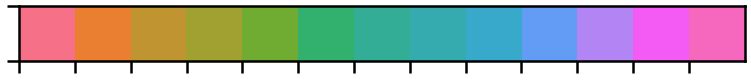

In [76]:
n_col = int(len(nodaleff_sig.columns)/2) + 1
interval = 1 / n_col
husl_pal = sns.husl_palette(n_colors=int(n_col))
husl_cmap = LinearSegmentedColormap.from_list(husl_pal, husl_pal, N=int(n_col))
sns.palplot(husl_pal)

crayons_l = sns.crayon_palette(['Vivid Tangerine', 'Cornflower'])
crayons_d = sns.crayon_palette(['Brick Red', 'Midnight Blue'])
grays = sns.light_palette('#999999', n_colors=3, reverse=True)

f_2 = sns.crayon_palette(['Red Orange', 'Vivid Tangerine'])
m_2 = sns.crayon_palette(['Cornflower', 'Cerulean'])

PRI2 post phys fci p 1
228 1.0
41 1.0
PRI2XClass post phys fci p 2
119 2.0
228 2.0
41 2.0
51 2.0
92 2.0
deltaPRIXClass post phys fci p 3
87 3.0
FSIQ2XClass post phys fci p 4
51 4.0
deltaPSI post phys retr p 5
51 5.0
deltaPSIXSex post phys retr p 6
51 6.0
deltaPSIXClass post phys retr p 7
51 7.0
PRI1XClass pre rest p 8
136 8.0
PRI2 post rest p 9
134 9.0
56 9.0
PRI2XClass post rest p 10
134 10.0
56 10.0
deltaFSIQXSex post rest p 11
235 11.0
deltaFSIQXClass post rest p 12
235 12.0


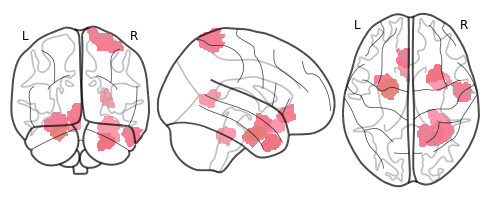

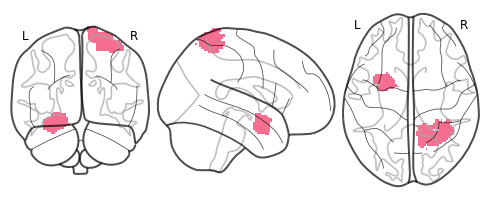

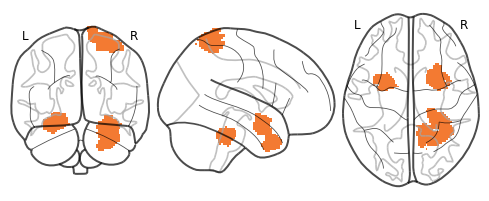

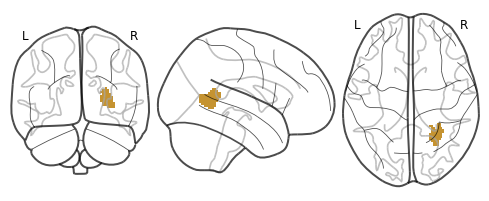

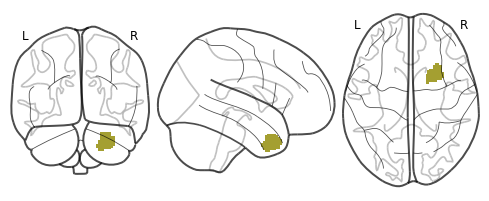

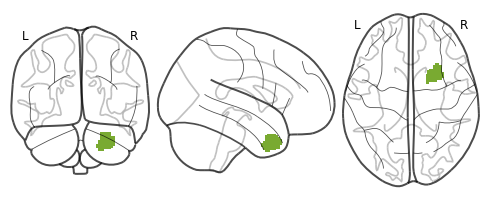

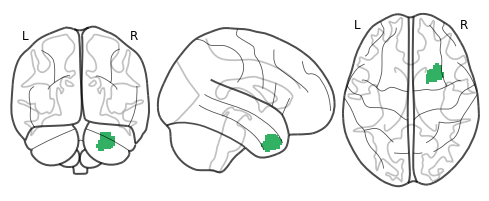

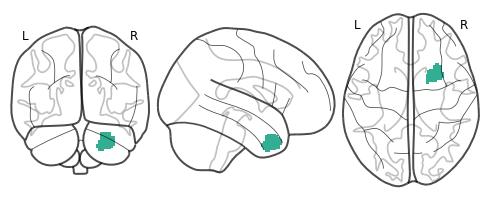

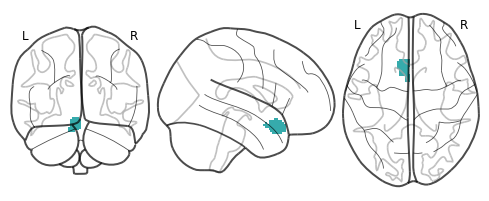

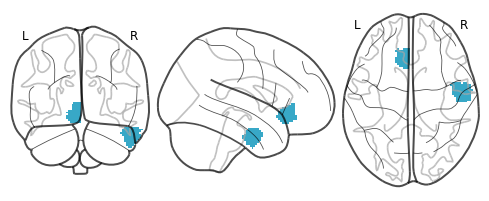

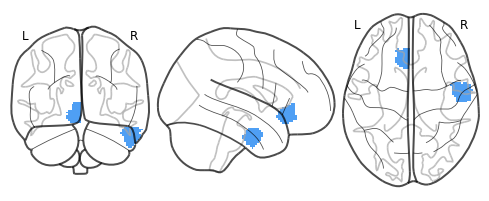

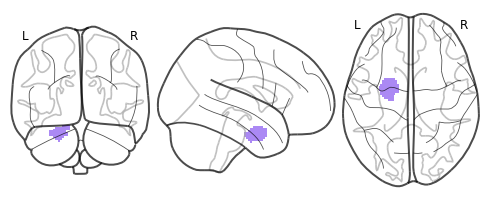

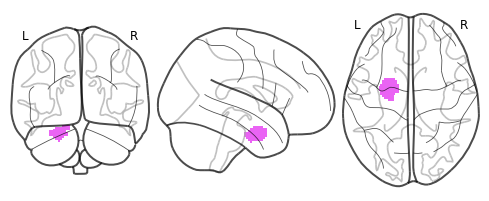

In [80]:
empty_nii = nib.load(join(roi_dir, 'roi101.nii.gz'))
empty_roi = empty_nii.get_fdata() * 0
empty = nib.Nifti1Image(empty_roi, empty_nii.affine)
g = plot_glass_brain(empty, colorbar=False, vmin=0.5, vmax=n_col)
i = 0

for column in nodaleff_sig.columns:
    if column[-1] == 'p':
        i += 1
        husl_pal = sns.husl_palette(h=(interval*i), n_colors=int(n_col))
        rois = None
        print(column, i)
        corr_nodes = []
        tvals = nodaleff_sig[nodaleff_sig[column] > 1]['{0}t'.format(column[:-1])]
        nodes = tvals.index
        corr_nodes.append(int(nodes[0].strip('lEff')))
        roi_nifti = nib.load(join(roi_dir,'roi{0}.nii.gz'.format(int(nodes[0].strip('lEff')))))
        roi = roi_nifti.get_fdata()
        rois = (roi * i)
        print(int(nodes[0].strip('lEff')), np.max(rois))
        if len(nodes) > 1:
            for node in nodes[1:]:
                corr_nodes.append(int(node.strip('lEff')))
                roi_nifti = nib.load(join(roi_dir,'roi{0}.nii.gz'.format(int(node.strip('lEff')))))
                roi = roi_nifti.get_fdata()
                rois += (roi * i)
                print(int(node.strip('lEff')), np.max(rois))
        else:
            pass
        np.savetxt(join(fig_dir, '{1}-{0}.txt'.format(column, i)), corr_nodes, delimiter=',')
        rois_nifti = nib.Nifti1Image(rois, roi_nifti.affine)
        rois_nifti.to_filename(join(data_dir, 'output/local_efficiency', '{0}_nodes.nii.gz'.format(column)))
        h = plot_glass_brain(rois_nifti, cmap=LinearSegmentedColormap.from_list(husl_pal, husl_pal, N=3))
        h.savefig(join(fig_dir, '{0}-{1}_ROIs.png'.format(i, column)), dpi=300)
        
        husl_pal = sns.husl_palette(n_colors=int(n_col))
        g.add_contours(rois_nifti, colors=husl_pal, filled=True, alpha=0.7)
        
    else:
        pass
    
g.savefig(join(fig_dir, 'LEffXIQ_ROIs-rest.png'), dpi=300)

In [78]:
n_col = int(len(nodaleff_sig.columns)/2) + 1
husl_pal = sns.husl_palette(n_colors=int(n_col))
husl_cmap = LinearSegmentedColormap.from_list(husl_pal, husl_pal, N=int(n_col))
i = 0
for column in nodaleff_sig.columns:
    iq = column.split(' ')[0].split('X')[0]
    if 'rest' in column:
        task = column.split(' ')[1] + ' ' + column.split(' ')[2]
    else:
        task = column.split(' ')[1] + ' ' + column.split(' ')[2] + ' ' + column.split(' ')[3]
    dat = effs[task]
    if column[-1] == 'p':
        
        husl_pal = sns.husl_palette(h=(interval*i), n_colors=int(n_col))

        print(column, i)
        all_data = pd.concat([big_df, dat[conns]], axis=1)
        all_data.dropna(how='any', axis=0, inplace=True)
        nodes = list(nodaleff_sig[nodaleff_sig[column] > 1].index)
        print(nodes)
        for node in nodes:
            if 'Sex' in column:
                if not 'Class' in column:
                    print(iq, 'x Sex', node, nodaleff_sig.at[node,'{0}t'.format(column[:-1])])
                    h = sns.lmplot(iq, node, data=all_data, hue='F', palette=crayons_d)
                    h.savefig(join(fig_dir, '{0}-{1}-scatter.png'.format(column, node)), dpi=300)
                    plt.close()
                else:
                    print(iq, 'x Sex x Class', node,  nodaleff_sig.at[node,'{0}t'.format(column[:-1])])
                    h = sns.lmplot(iq, node, data=all_data[all_data['F'] == 1], hue='Mod', palette=f_2)
                    h.savefig(join(fig_dir, '{0}-{1}-scatter-f.png'.format(column, node)), dpi=300)
                    h = sns.lmplot(iq, node, data=all_data[all_data['F'] == 0], hue='Mod', palette=m_2)
                    h.savefig(join(fig_dir, '{0}-{1}-scatter-m.png'.format(column, node)), dpi=300)
                    plt.close()
            elif 'Class' in column:
                if not 'Sex' in column:
                    print(iq, 'x Class', node,  nodaleff_sig.at[node,'{0}t'.format(column[:-1])])
                    h = sns.lmplot(iq, node, data=all_data, hue='Mod', palette=grays)
                    h.savefig(join(fig_dir, '{0}-{1}-scatter.png'.format(column, node)), dpi=300)
                    plt.close()
                else:
                    print(iq, 'x Sex x Class', node,  nodaleff_sig.at[node,'{0}t'.format(column[:-1])])
                    h = sns.lmplot(iq, node, data=all_data[all_data['F'] == 1], hue='Mod', palette=f_2)
                    h.savefig(join(fig_dir, '{0}-{1}-scatter-f.png'.format(column, node)), dpi=300)
                    h = sns.lmplot(iq, node, data=all_data[all_data['F'] == 0], hue='Mod', palette=m_2)
                    h.savefig(join(fig_dir, '{0}-{1}-scatter-m.png'.format(column, node)), dpi=300)
                    plt.close()
            else:
                print('no interxn', iq, node, nodaleff_sig.at[node,'{0}t'.format(column[:-1])])
                fig,ax = plt.subplots()
                sns.regplot(all_data[iq], all_data[node], color=husl_pal[0])
                sns.despine()
                plt.tight_layout()
                fig.savefig(join(fig_dir, '{0}-{1}-scatter.png'.format(column, node)), dpi=300)
                plt.close()
        i += 1

PRI2 post phys fci p 0
['lEff228', 'lEff41']
no interxn PRI2 lEff228 3.1532652559705845
no interxn PRI2 lEff41 3.231605895321012
PRI2XClass post phys fci p 1
['lEff119', 'lEff228', 'lEff41', 'lEff51', 'lEff92']
PRI2 x Class lEff119 -3.409015046573322
PRI2 x Class lEff228 -3.666328385985916
PRI2 x Class lEff41 -3.8286416469997904
PRI2 x Class lEff51 -3.516216614230917
PRI2 x Class lEff92 -3.1806194151566367
deltaPRIXClass post phys fci p 2
['lEff87']
deltaPRI x Class lEff87 -3.485626622874871
FSIQ2XClass post phys fci p 3
['lEff51']
FSIQ2 x Class lEff51 -3.3183596376452464
deltaPSI post phys retr p 4
['lEff51']
no interxn deltaPSI lEff51 3.3115954897959985
deltaPSIXSex post phys retr p 5
['lEff51']
deltaPSI x Sex lEff51 -3.0341358563423277
deltaPSIXClass post phys retr p 6
['lEff51']
deltaPSI x Class lEff51 -3.0189883627307794
PRI1XClass pre rest p 7
['lEff136']
PRI1 x Class lEff136 -3.415142317055156
PRI2 post rest p 8
['lEff134', 'lEff56']
no interxn PRI2 lEff134 3.3276944306631764
no

In [69]:
n_col = int(len(nodaleff_sig.columns)/2) + 1
husl_pal = sns.husl_palette(n_colors=int(n_col))
husl_cmap = LinearSegmentedColormap.from_list(husl_pal, husl_pal, N=int(n_col))
for i in np.arange(0, n_col):
    i+=1
    husl_pal = sns.husl_palette(h=(0.111*i), n_colors=n_col)
    print(sns.palplot(LinearSegmentedColormap.from_list(husl_pal, husl_pal, N=3)))
    

TypeError: object of type 'LinearSegmentedColormap' has no len()

In [70]:
(LinearSegmentedColormap.from_list(husl_pal, husl_pal, N=3))